In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
data = pd.read_excel('dataset.xlsx')

# Get DataFrame from Dict
df = data.get('1. Dataset')



In [2]:
df

Account_Type Cheque_Card_Flag  Gross_Annual_Income  Loan_Amount  \
0     Variable Loan              Yes                12000         2300   
1        Fixed Loan               No                29000         1400   
2     Variable Loan               No                 8000         1000   
3        Fixed Loan              Yes                 8000          814   
4        Fixed Loan              Yes                    0         1000   
...             ...              ...                  ...          ...   
2995  Variable Loan               No                 8500         1000   
2996     Fixed Loan              Yes                11000            0   
2997     Fixed Loan               No                25000         3500   
2998     Fixed Loan              Yes                19200            0   
2999     Fixed Loan              Yes                16868         4000   

     Loan_Payment_Method  Number_of_Payments  Time_in_Employment  \
0           Bank Payment                 999                1100   
1           Bank Payment                 999                1300   
2           Bank Payment                 999                 400   
3                 Cheque                  12                 706   
4                                         24                   0   
...                  ...                 ...                 ...   
2995        Bank Payment                 999                 206   
2996              Cheque                 999                 110   
2997        Bank Payment                 999                1200   
2998        Bank Payment                 999                1705   
2999        Bank Payment                 999                 100   

      Time_with_Bank  Bureau_Score  SP_Number_Of_Searches_L6M  \
0                710           957                          5   
1               1211           957                         19   
2                207           845                          0   
3               1212           901                          0   
4               1112           987                          0   
...              ...           ...                        ...   
2995             203           889                          1   
2996             204           846                          5   
2997             906           996                          5   
2998             106           898                          1   
2999             808          1002                          0   

      SP_Number_of_CCJs  target  
0                     0       0  
1                     0       0  
2                     0       0  
3                     0       0  
4                     0       0  
...                 ...     ...  
2995                  0       0  
2996                  0       0  
2997                  0       0  
2998                  0       0  
2999                  0       0  

[3000 rows x 12 columns]

As we can see in the above dataframe, there are missing values ' ' so we will replace the ' ' with NaN value so we will remove them in the further step.

In [3]:
df = df.replace({' ': np.nan})

Get an over view of data type and check if there is any null value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Account_Type               3000 non-null   object
 1   Cheque_Card_Flag           2999 non-null   object
 2   Gross_Annual_Income        3000 non-null   int64 
 3   Loan_Amount                3000 non-null   int64 
 4   Loan_Payment_Method        2864 non-null   object
 5   Number_of_Payments         3000 non-null   int64 
 6   Time_in_Employment         3000 non-null   int64 
 7   Time_with_Bank             3000 non-null   int64 
 8   Bureau_Score               3000 non-null   int64 
 9   SP_Number_Of_Searches_L6M  3000 non-null   int64 
 10  SP_Number_of_CCJs          3000 non-null   int64 
 11  target                     3000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 281.4+ KB


A summary of how many null values in the dataframe

In [5]:
df.isnull().sum()

Account_Type                   0
Cheque_Card_Flag               1
Gross_Annual_Income            0
Loan_Amount                    0
Loan_Payment_Method          136
Number_of_Payments             0
Time_in_Employment             0
Time_with_Bank                 0
Bureau_Score                   0
SP_Number_Of_Searches_L6M      0
SP_Number_of_CCJs              0
target                         0
dtype: int64

Check the upplicated and missing values and remove rows with these issues.

In [6]:
#checking duplicated data
if(df.duplicated().any()):
    print('There is duplicate data')
    df.drop_duplicates() #remove duplicated data

#checking missing/na values
if(df.isna().any().any()):
    print('There is missing data')
    df = df.dropna()

# resetting the DataFrame index
df = df.reset_index(drop=True)

There is missing data


An overview of descriptive statistics on numerical values

In [7]:
df.describe().T

count          mean           std    min      25%  \
Gross_Annual_Income        2863.0  15773.164163   9062.723192  520.0  10000.0   
Loan_Amount                2863.0   7872.530213  18009.888468    0.0   1626.0   
Number_of_Payments         2863.0    565.005589    482.813922    6.0     30.0   
Time_in_Employment         2863.0    875.577716    803.458646    0.0    206.0   
Time_with_Bank             2863.0    697.154733    502.878069    0.0    302.0   
Bureau_Score               2863.0    932.130632     68.556299  657.0    883.0   
SP_Number_Of_Searches_L6M  2863.0      2.148795      2.972305    0.0      0.0   
SP_Number_of_CCJs          2863.0      0.078589      0.533739    0.0      0.0   
target                     2863.0      0.092910      0.290356    0.0      0.0   

                               50%      75%       max  
Gross_Annual_Income        14000.0  19500.0  120000.0  
Loan_Amount                 3600.0   6500.0  232100.0  
Number_of_Payments           999.0    999.0     999.0  
Time_in_Employment           606.0   1355.5    4500.0  
Time_with_Bank               612.0   1110.0    4302.0  
Bureau_Score                 941.0    983.0    1058.0  
SP_Number_Of_Searches_L6M      1.0      3.0      35.0  
SP_Number_of_CCJs              0.0      0.0      10.0  
target                         0.0      0.0       1.0

Visualization of the descriptive statistics

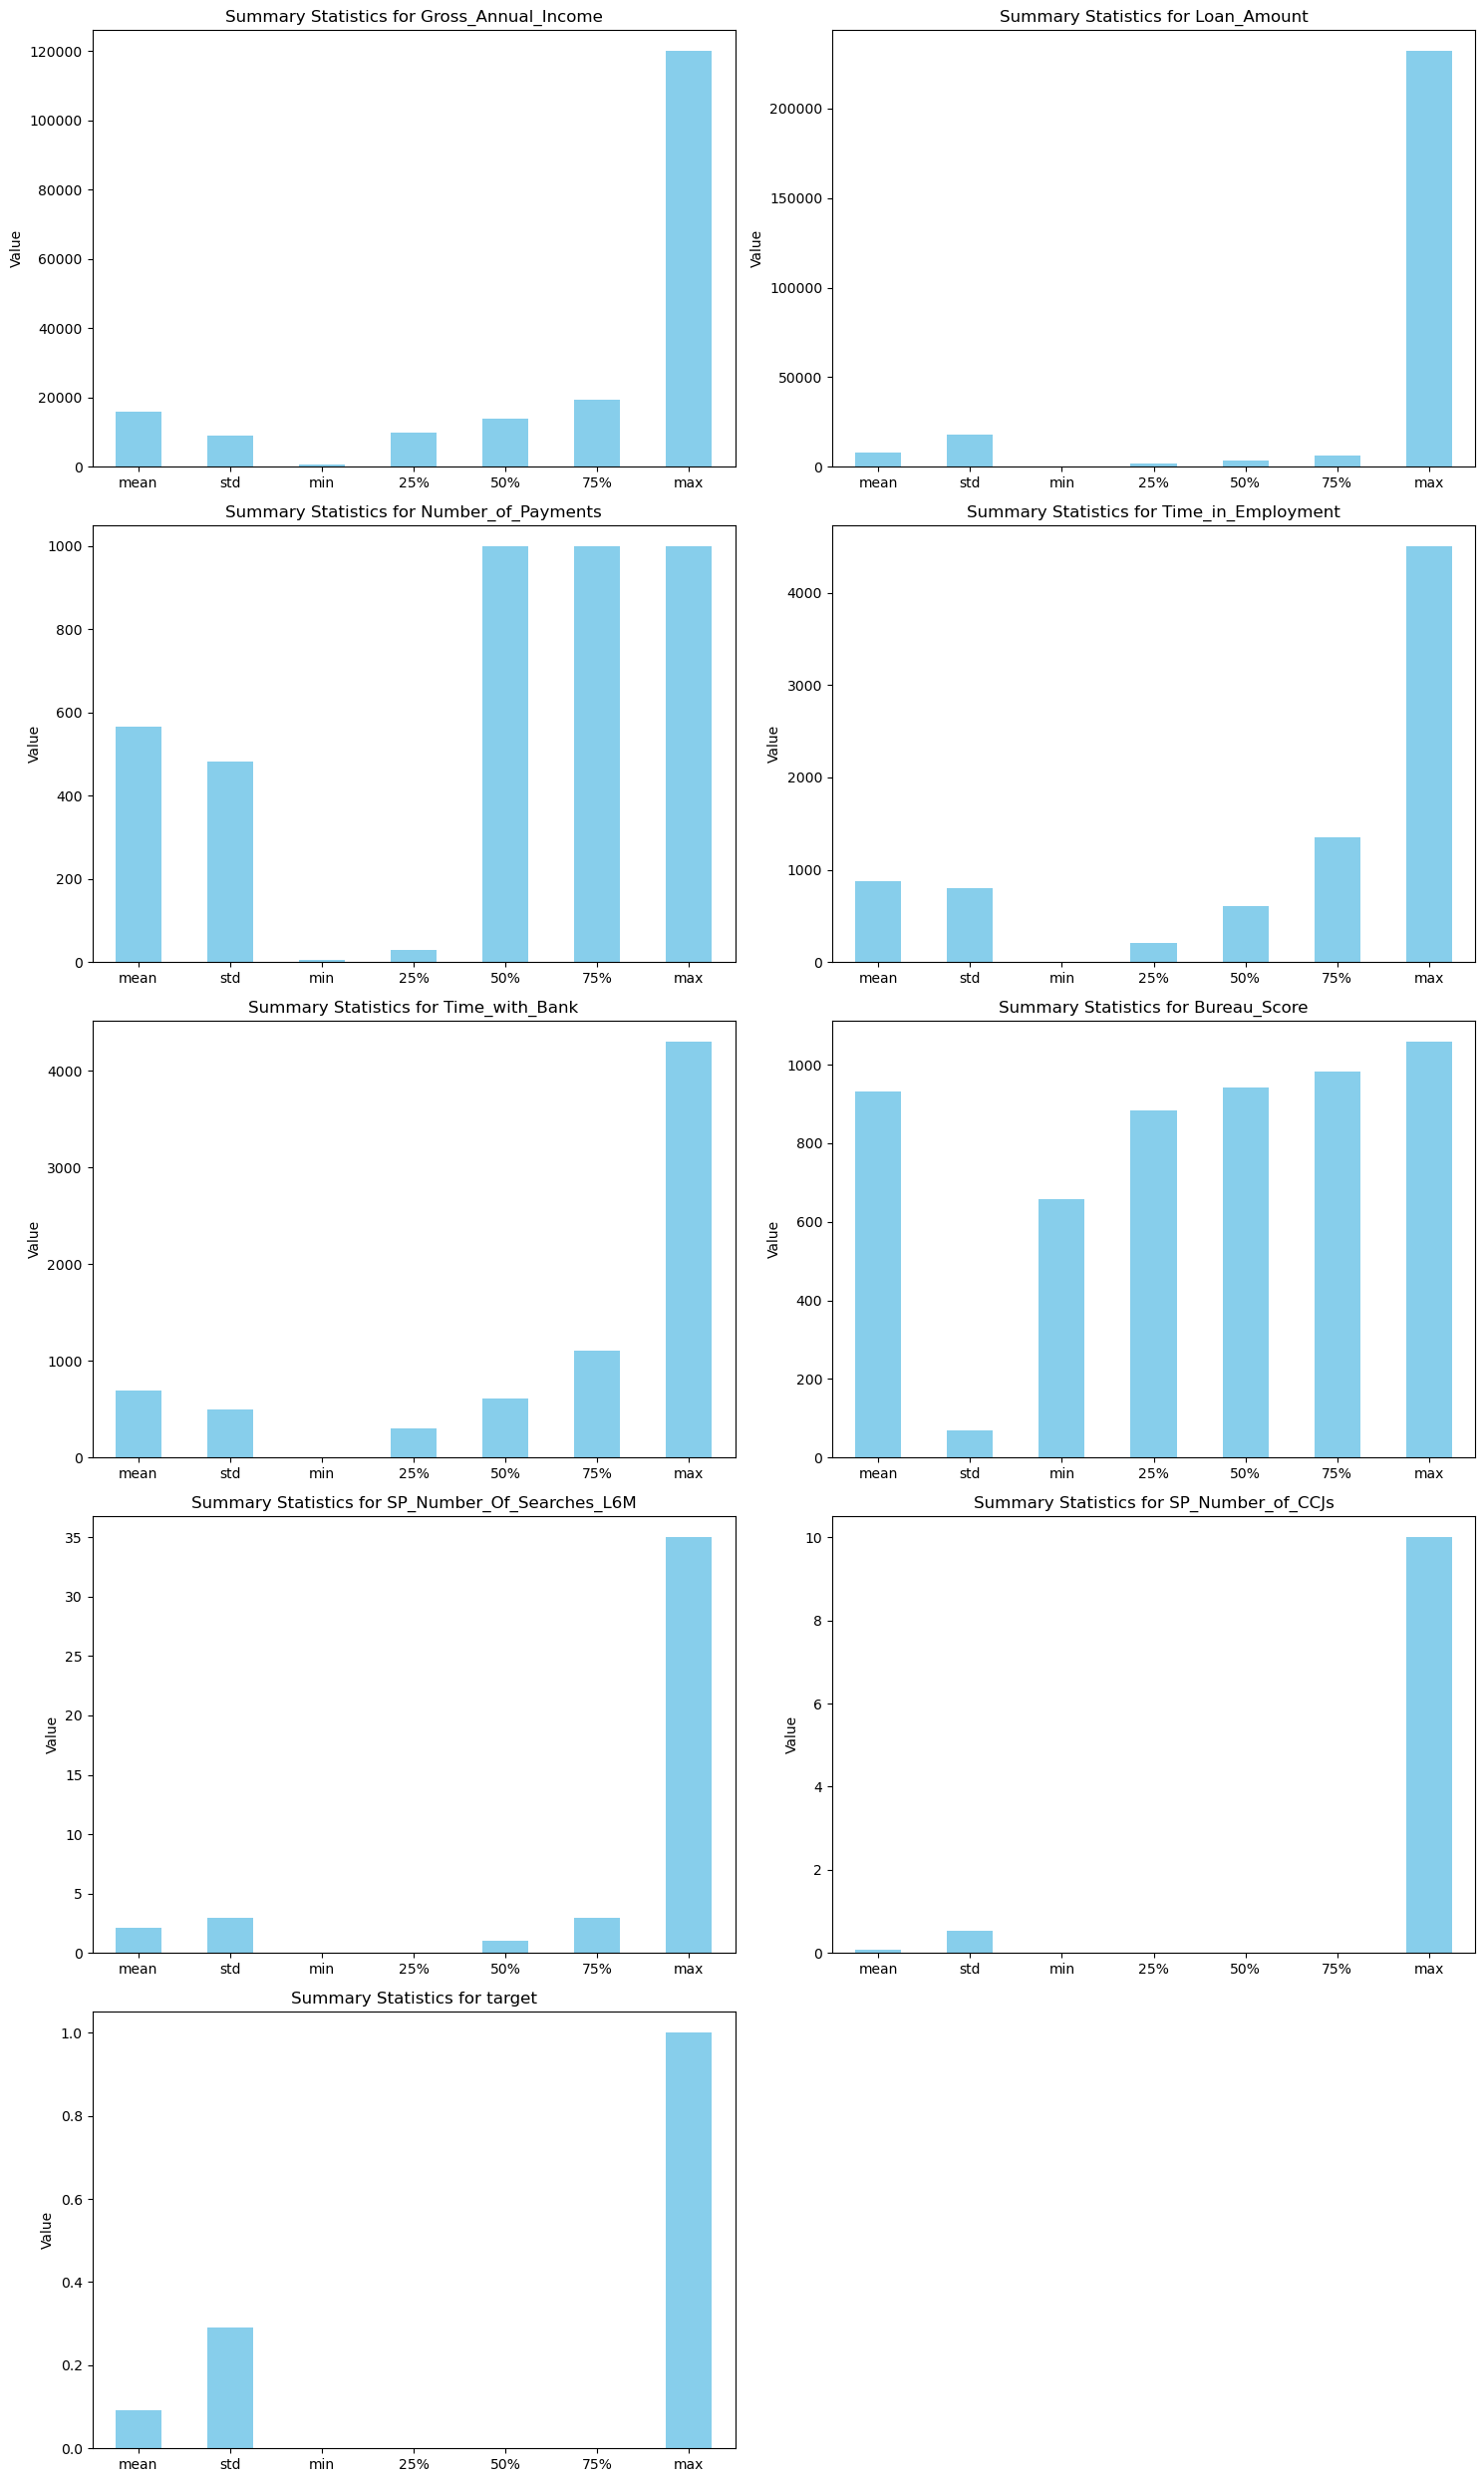

In [8]:
import math
summary_stats = df.describe().T
summary_stats = summary_stats.drop('count', axis='columns')
num_rows = math.ceil(len(summary_stats) / 2)

# Create subplots with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Plot each row in a separate plot
for i, (index, row) in enumerate(summary_stats.iterrows()):
    row.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Summary Statistics for {index}')
    axes[i].set_ylabel('Value')
    axes[i].set_xticklabels(row.index, rotation=45)
    axes[i].tick_params(axis='x', labelrotation=0)

# Hide empty subplots
for i in range(len(summary_stats), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Descriptive Statistics Insights

- **Gross Annual Income:**
  - The average gross annual income is approximately \\$15,773.16, with a range from \\$520.00 to $120,000.00.
  - The standard deviation is approximately \\$9,062.72, indicating variability in income.

- **Loan Amount:**
  - The average loan amount is approximately \\$7,872.53, with a wide range from \\$0.00 to \\$232,100.00.
  - The standard deviation is approximately \\$18,009.89, indicating variability and potential outliers in the data.

- **Number of Payments:**
  - The majority of the data centers around 999 payments, with a mean of approximately 565.01 payments.
  - The minimum number of payments is 6.

- **Time in Employment:**
  - The average time in employment is approximately 875.58.
  - The standard deviation is approximately 803.46, indicating significant variability in employment duration.

- **Time with Bank:**
  - The average time with the bank is approximately 697.15.
  - The standard deviation is approximately 502.88, indicating significant variability in the duration of being a customer of the bank.

- **Bureau Score:**
  - The bureau score ranges from 657 to 1,058, with an average score of approximately 932.13.
  - Higher scores indicate better creditworthiness.

- **SP Number Of Searches L6M:**
  - On average, there have been around 2.15 searches in the last 6 months, with a maximum of 35 searches.

- **SP Number of CCJs:**
  - Most entries have 0 County Court Judgments (CCJs), with a mean of approximately 0.08 CCJs.
  - A few entries have up to 10 CCJs.

- **Target:**
  - The target variable is binary, assuming values 0 or 1.
  - The mean suggests that approximately 9.29% of the cases have a positive outcome (assuming 1 indicates a positive outcome).


Getting the categorical values information

In [9]:
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
df_cat = df[cat_cols]
df_cat.count()

Account_Type           2863
Cheque_Card_Flag       2863
Loan_Payment_Method    2863
dtype: int64

And descriptive statistics on categorical values

In [10]:
df.describe(include='object').T

count unique           top  freq
Account_Type         2863      2    Fixed Loan  1993
Cheque_Card_Flag     2863      2           Yes  1930
Loan_Payment_Method  2863      4  Bank Payment  2076

### Data Insights

- **Account Type:**
  - Total count of entries: 2863
  - Unique values: 2
  - Most frequent value: Fixed Loan
  - Frequency of most frequent value: 1993

- **Cheque Card Flag:**
  - Total count of entries: 2863
  - Unique values: 2
  - Most frequent value: Yes
  - Frequency of most frequent value: 1930

- **Loan Payment Method:**
  - Total count of entries: 2863
  - Unique values: 4
  - Most frequent value: Bank Payment
  - Frequency of most frequent value: 2076


Check the proportion of 2 classes of the target value

In [11]:
import plotly.express as ex
ex.pie(df,names='target',title='Propotion Of target')

Similarly, check the proportion of other categorical virables

In [12]:
ex.pie(df_cat,names='Loan_Payment_Method',title='Loan_Payment_Method')

In [13]:
ex.pie(df,names='Cheque_Card_Flag',title='Cheque_Card_Flag')

Get dataframe with numeric values only

In [14]:
num_cols = df.iloc[:,:-1].select_dtypes(include=['int','float']).columns.tolist()
df_num = df[num_cols]
df_num

Gross_Annual_Income  Loan_Amount  Number_of_Payments  \
0                   12000         2300                 999   
1                   29000         1400                 999   
2                    8000         1000                 999   
3                    8000          814                  12   
4                   15000         6500                 999   
...                   ...          ...                 ...   
2858                 8500         1000                 999   
2859                11000            0                 999   
2860                25000         3500                 999   
2861                19200            0                 999   
2862                16868         4000                 999   

      Time_in_Employment  Time_with_Bank  Bureau_Score  \
0                   1100             710           957   
1                   1300            1211           957   
2                    400             207           845   
3                    706            1212           901   
4                   1000             507           824   
...                  ...             ...           ...   
2858                 206             203           889   
2859                 110             204           846   
2860                1200             906           996   
2861                1705             106           898   
2862                 100             808          1002   

      SP_Number_Of_Searches_L6M  SP_Number_of_CCJs  
0                             5                  0  
1                            19                  0  
2                             0                  0  
3                             0                  0  
4                             3                  0  
...                         ...                ...  
2858                          1                  0  
2859                          5                  0  
2860                          5                  0  
2861                          1                  0  
2862                          0                  0  

[2863 rows x 8 columns]

Check the distribution of the numerical variables

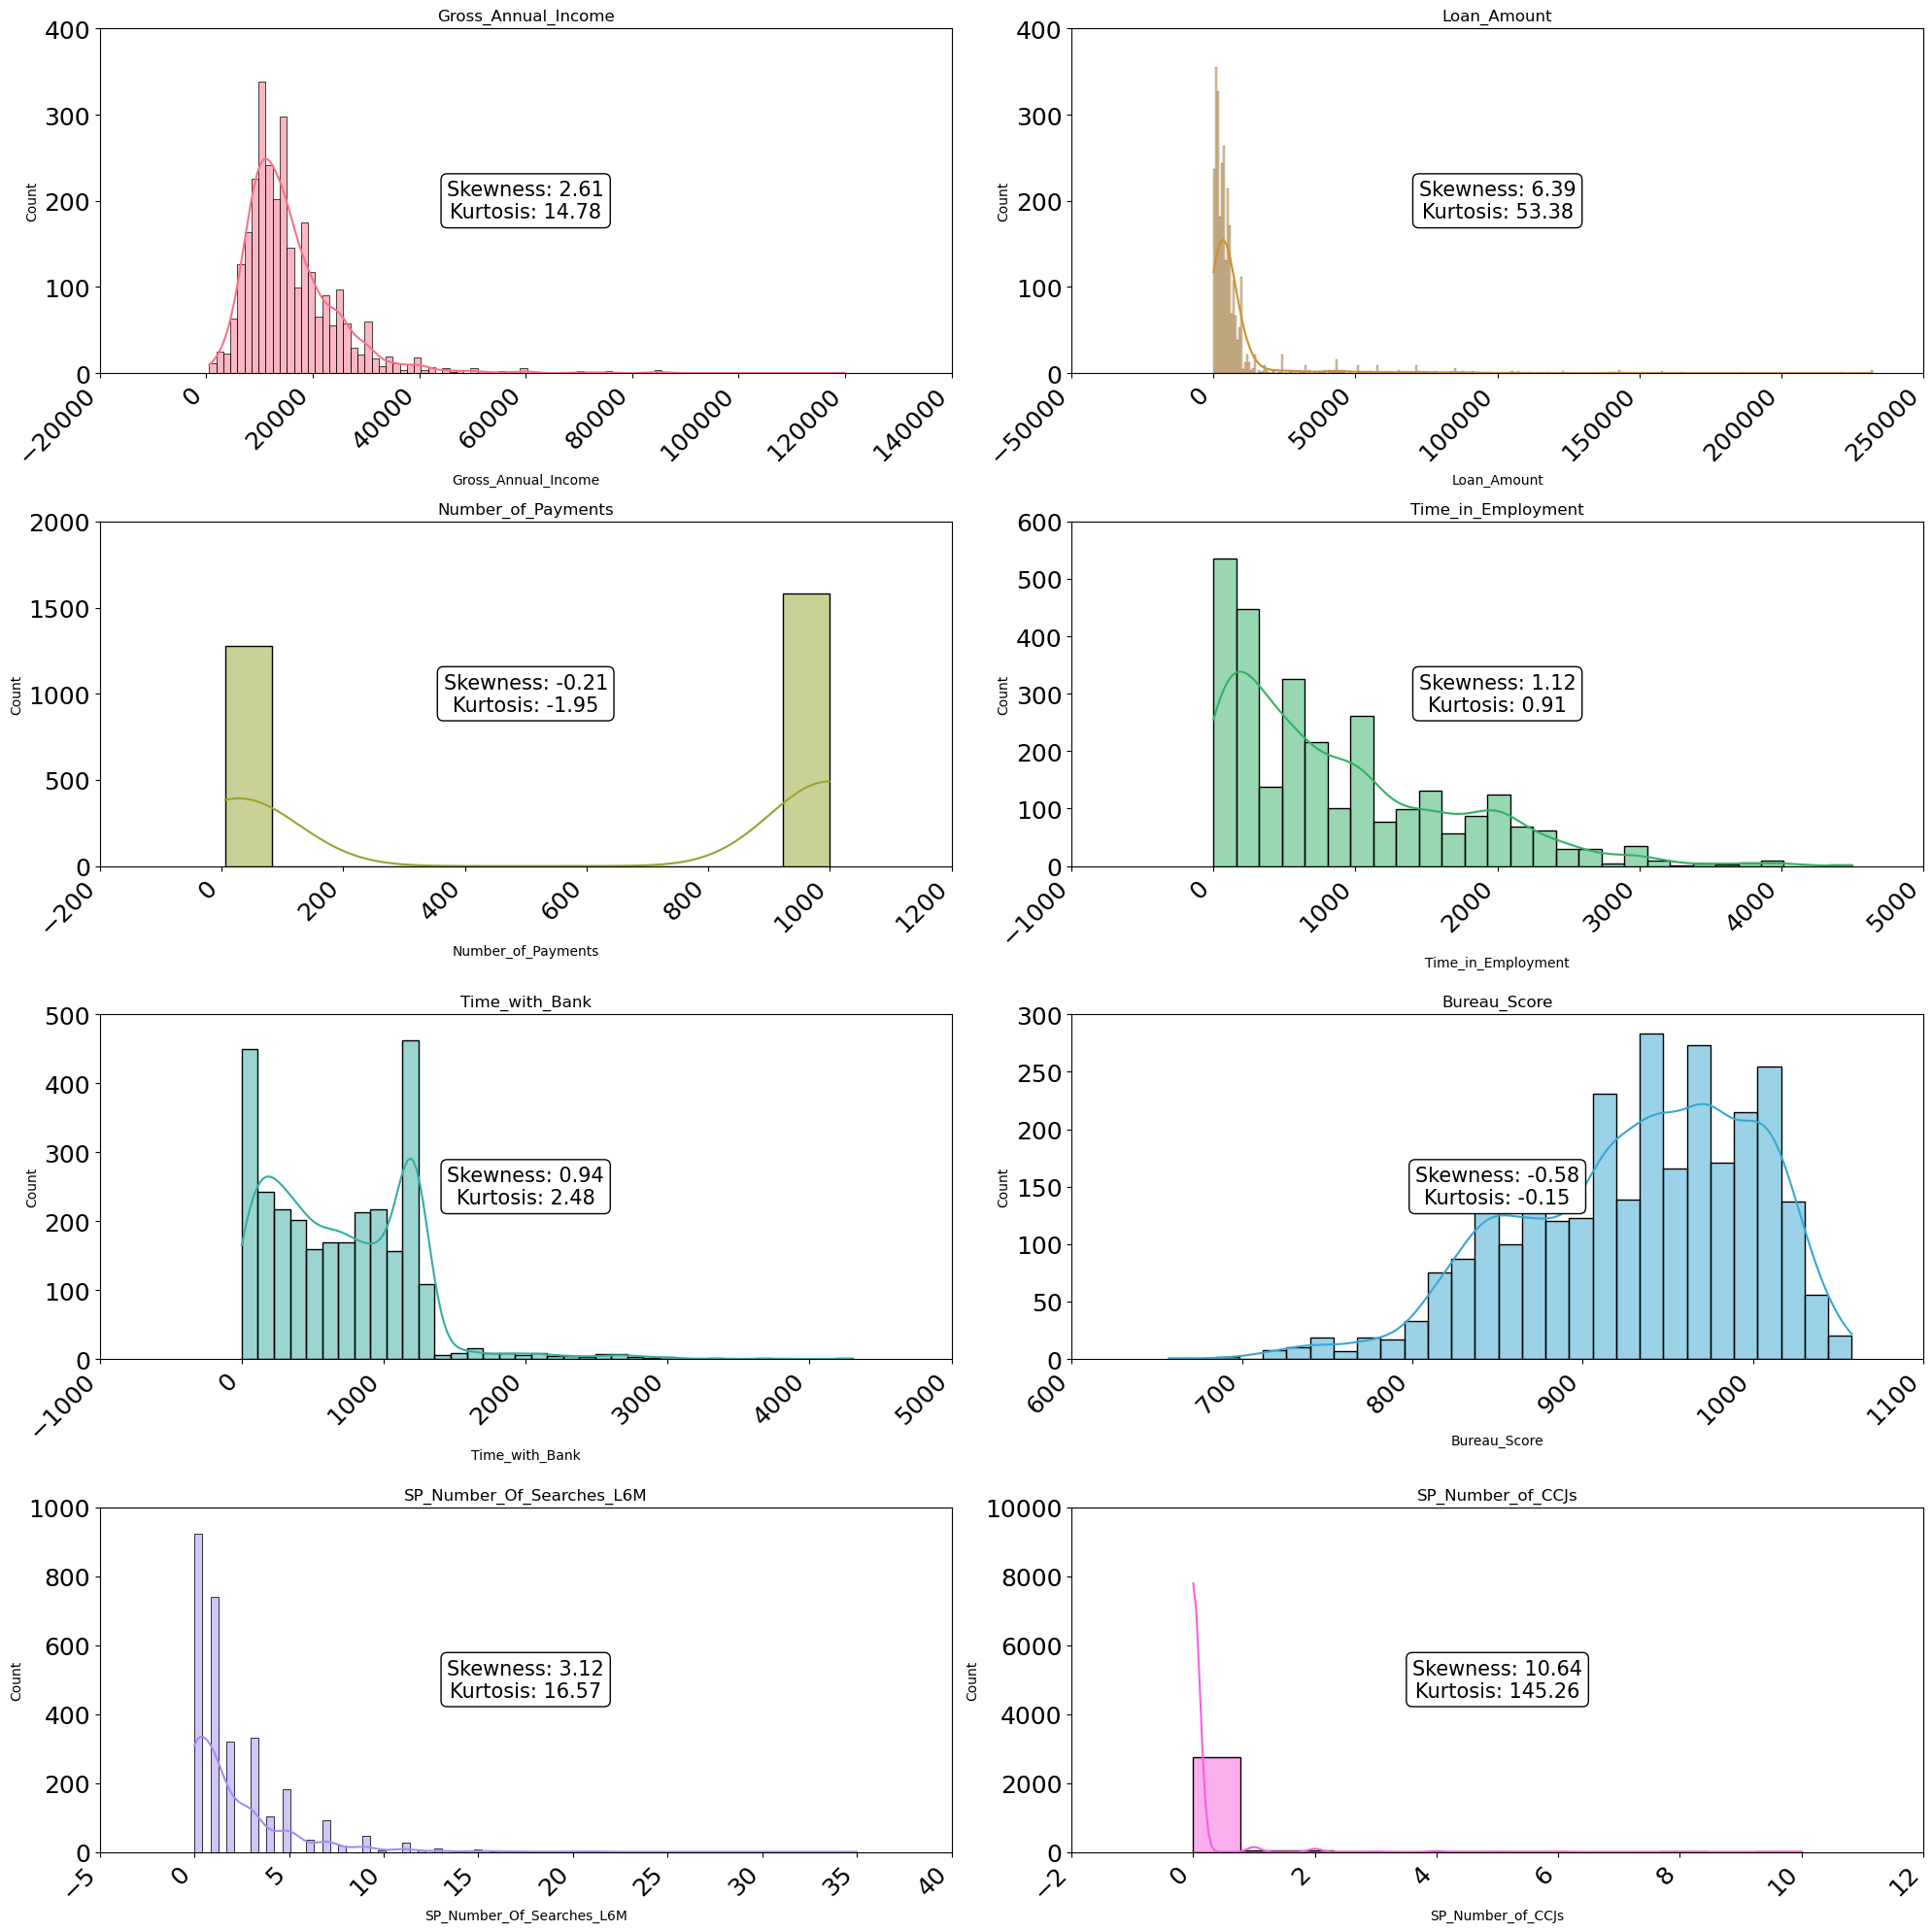

In [15]:
skew_values = df_num.skew()
kurtosis_values = df_num.kurtosis()

# Calculate number of rows needed for subplots
num_rows = math.ceil(len(skew_values) / 2)

# Generate random colors for each subplot
colors = sns.color_palette('husl', len(skew_values))

# Create a figure and a set of subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()
# Plot histograms and add skewness and kurtosis text with random colors
for i, (col, skew, kurtosis, color) in enumerate(zip(skew_values.index, skew_values, kurtosis_values, colors)):
    if i < len(axs):
        ax = sns.histplot(data=df_num[col], kde=True, ax=axs[i], color=color)
        text = f'Skewness: {skew:.2f}\nKurtosis: {kurtosis:.2f}'
        ax.annotate(text, xy=(0.5, 0.5), xycoords='axes fraction',
                    fontsize=15, ha='center', va='center', color='black', bbox=dict(boxstyle="round,pad=0.3", fc="white"))

        ax.set_title(col)
        ax.tick_params(axis='both', labelsize=20) 
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=45, ha='right')

        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
# Hide any empty subplots
for i in range(len(skew_values), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

In [16]:
import warnings
warnings.filterwarnings('ignore')
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Remove outliers for each feature
df_no_outliers = df.copy()

# Remove outliers for each feature
for feature in df_num.columns[:-1]:
    outlier_index = remove_outliers_iqr(df[feature])
    df_no_outliers = df_no_outliers[~outlier_index]

# Display the DataFrame after dropping rows with outliers
df_no_outliers
df = df_no_outliers.copy()
df

Account_Type Cheque_Card_Flag  Gross_Annual_Income  Loan_Amount  \
0     Variable Loan              Yes                12000         2300   
2     Variable Loan               No                 8000         1000   
3        Fixed Loan              Yes                 8000          814   
4        Fixed Loan              Yes                15000         6500   
5        Fixed Loan               No                 8500         1000   
...             ...              ...                  ...          ...   
2858  Variable Loan               No                 8500         1000   
2859     Fixed Loan              Yes                11000            0   
2860     Fixed Loan               No                25000         3500   
2861     Fixed Loan              Yes                19200            0   
2862     Fixed Loan              Yes                16868         4000   

     Loan_Payment_Method  Number_of_Payments  Time_in_Employment  \
0           Bank Payment                 999                1100   
2           Bank Payment                 999                 400   
3                 Cheque                  12                 706   
4         Standing Order                 999                1000   
5           Bank Payment                  12                1600   
...                  ...                 ...                 ...   
2858        Bank Payment                 999                 206   
2859              Cheque                 999                 110   
2860        Bank Payment                 999                1200   
2861        Bank Payment                 999                1705   
2862        Bank Payment                 999                 100   

      Time_with_Bank  Bureau_Score  SP_Number_Of_Searches_L6M  \
0                710           957                          5   
2                207           845                          0   
3               1212           901                          0   
4                507           824                          3   
5                807           963                          0   
...              ...           ...                        ...   
2858             203           889                          1   
2859             204           846                          5   
2860             906           996                          5   
2861             106           898                          1   
2862             808          1002                          0   

      SP_Number_of_CCJs  target  
0                     0       0  
2                     0       0  
3                     0       0  
4                     0       0  
5                     0       0  
...                 ...     ...  
2858                  0       0  
2859                  0       0  
2860                  0       0  
2861                  0       0  
2862                  0       0  

[2352 rows x 12 columns]

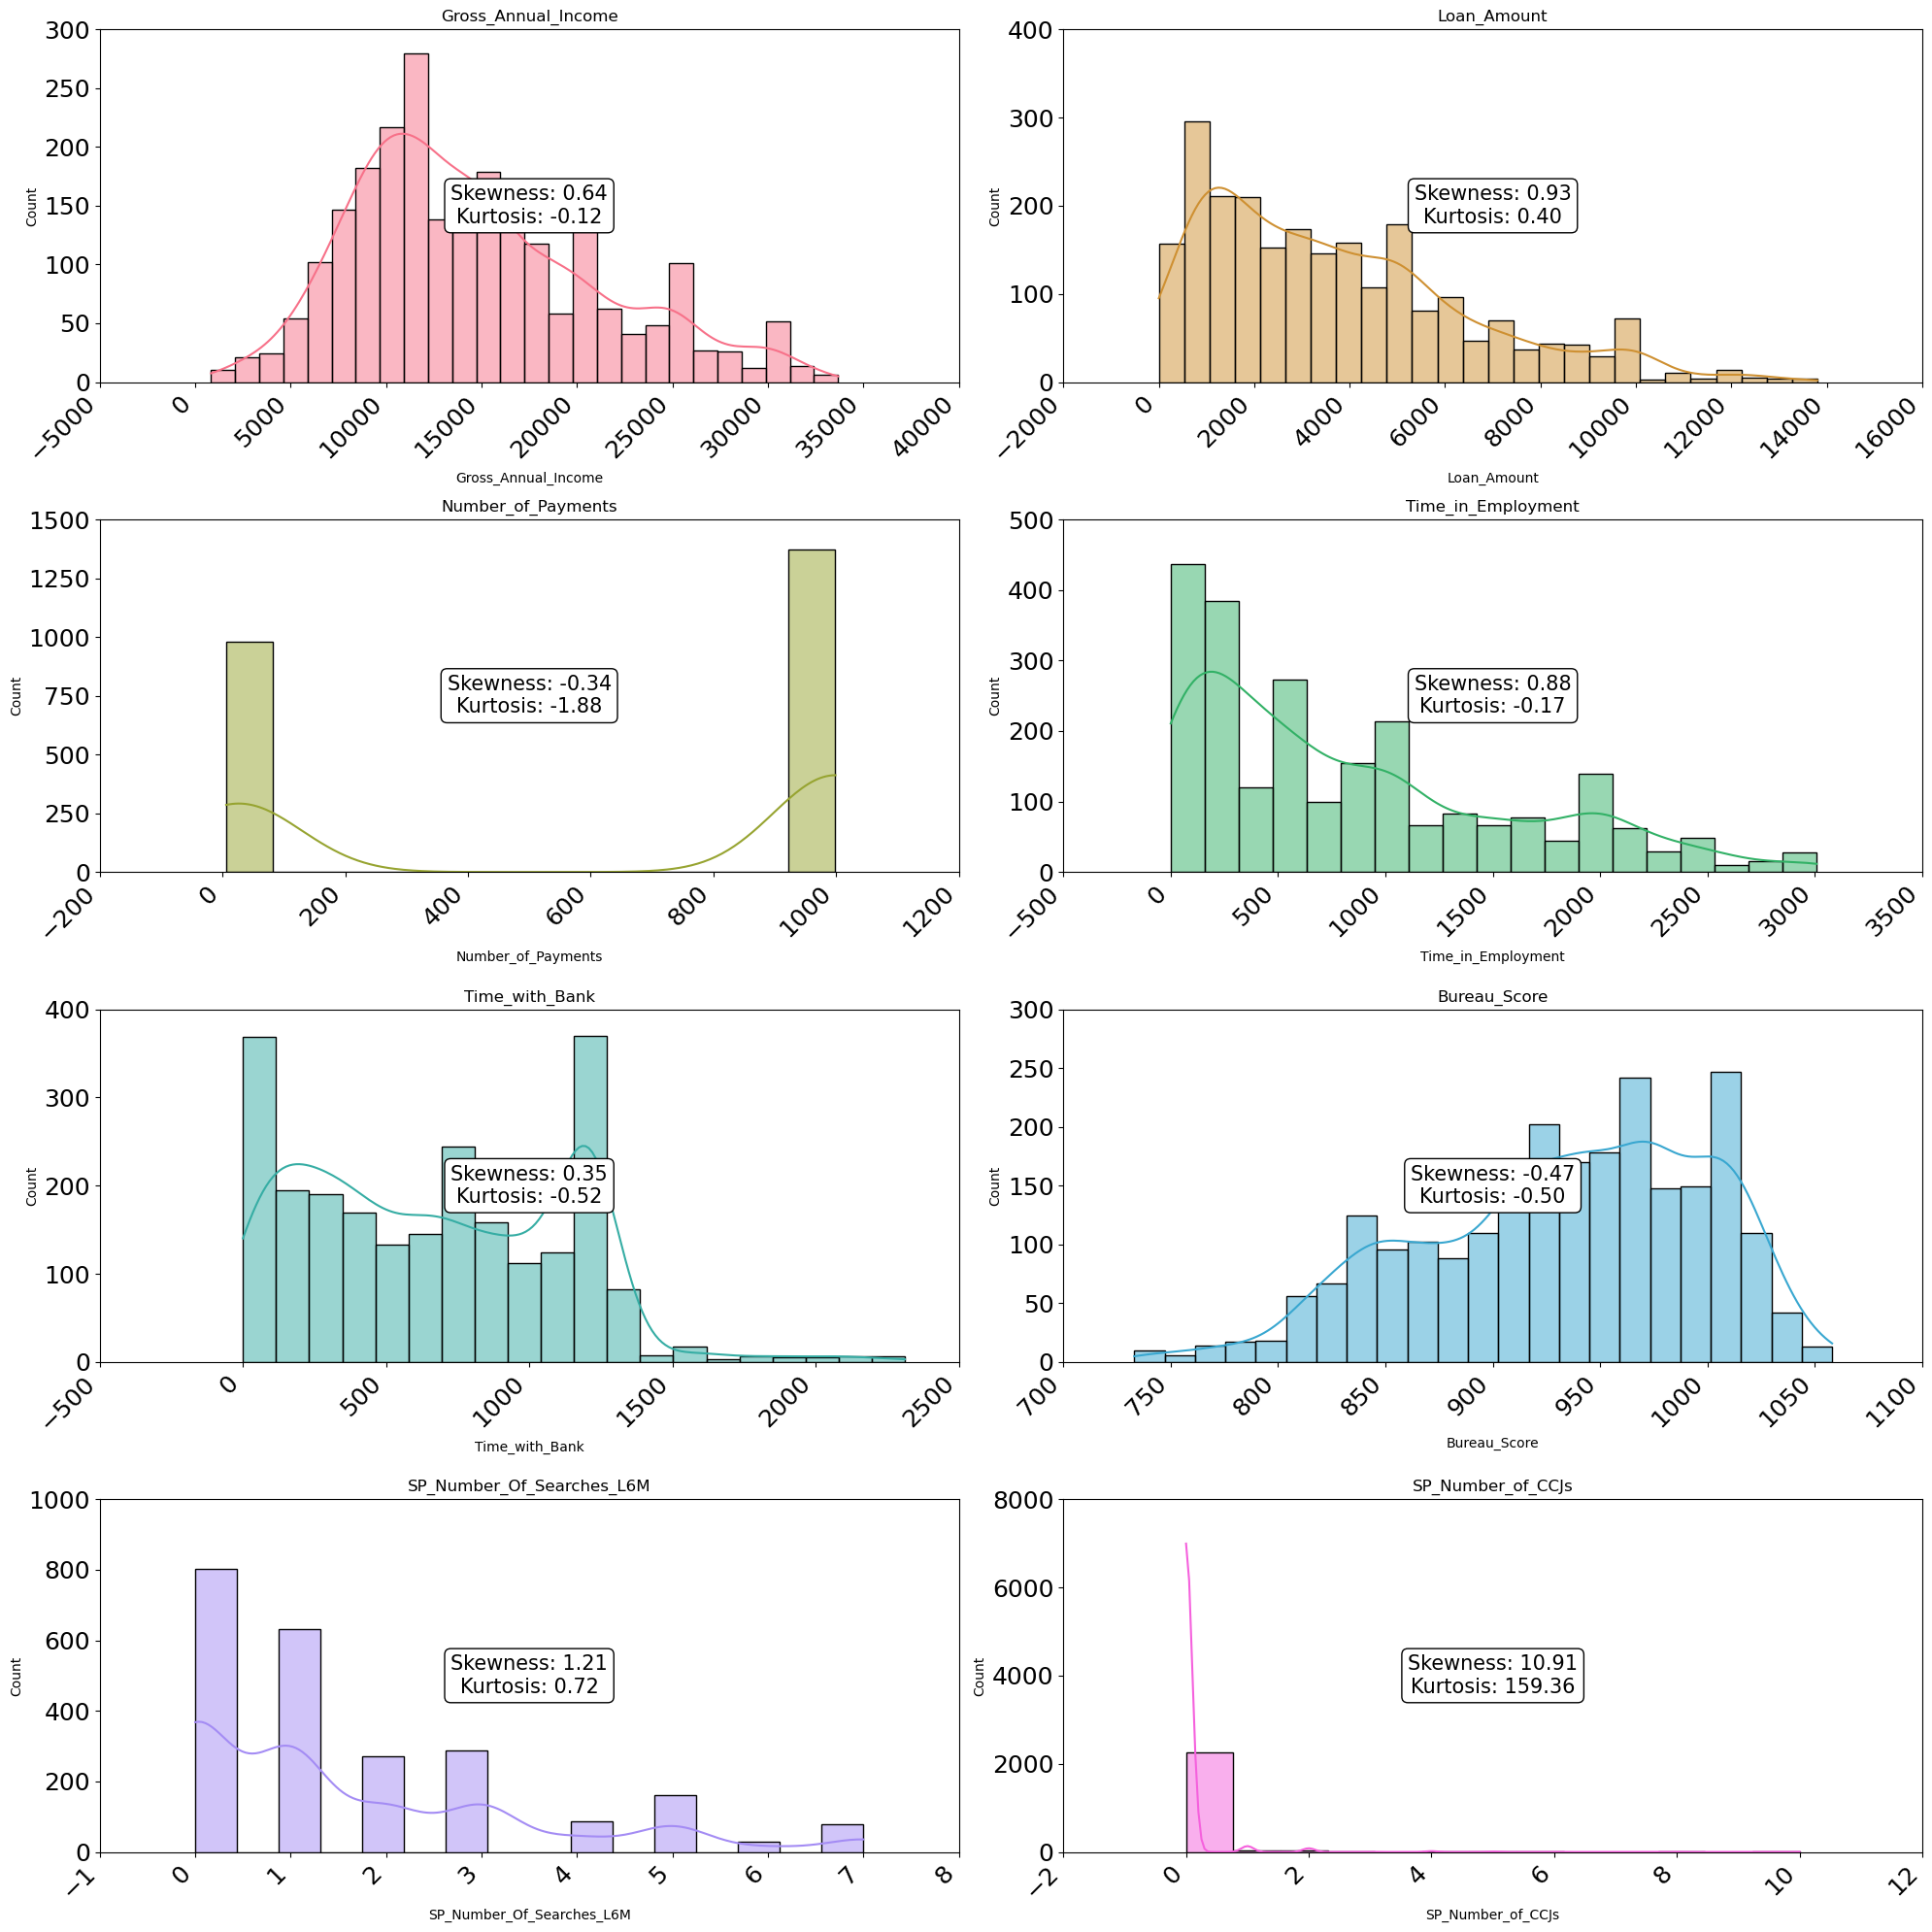

In [17]:
df_num = df[num_cols]
df_cat = df[cat_cols]
skew_values = df_num.skew()
kurtosis_values = df_num.kurtosis()

# Calculate number of rows needed for subplots
num_rows = math.ceil(len(skew_values) / 2)

# Generate random colors for each subplot
colors = sns.color_palette('husl', len(skew_values))

# Create a figure and a set of subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()
# Plot histograms and add skewness and kurtosis text with random colors
for i, (col, skew, kurtosis, color) in enumerate(zip(skew_values.index, skew_values, kurtosis_values, colors)):
    if i < len(axs):
        ax = sns.histplot(data=df_num[col], kde=True, ax=axs[i], color=color)
        text = f'Skewness: {skew:.2f}\nKurtosis: {kurtosis:.2f}'
        ax.annotate(text, xy=(0.5, 0.5), xycoords='axes fraction',
                    fontsize=15, ha='center', va='center', color='black', bbox=dict(boxstyle="round,pad=0.3", fc="white"))

        ax.set_title(col)
        ax.tick_params(axis='both', labelsize=20) 
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=45, ha='right')

        ax.set_yticks(ax.get_yticks())
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
# Hide any empty subplots
for i in range(len(skew_values), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Check Pearson correlation among numerical variables and with the target variable

In [18]:
df.corr(numeric_only=True)

Gross_Annual_Income  Loan_Amount  \
Gross_Annual_Income                   1.000000     0.264821   
Loan_Amount                           0.264821     1.000000   
Number_of_Payments                    0.231399     0.052625   
Time_in_Employment                    0.366346     0.094063   
Time_with_Bank                        0.287978     0.097119   
Bureau_Score                          0.373969     0.123901   
SP_Number_Of_Searches_L6M             0.096123     0.096812   
SP_Number_of_CCJs                    -0.021600    -0.000458   
target                               -0.097828     0.007251   

                           Number_of_Payments  Time_in_Employment  \
Gross_Annual_Income                  0.231399            0.366346   
Loan_Amount                          0.052625            0.094063   
Number_of_Payments                   1.000000            0.087239   
Time_in_Employment                   0.087239            1.000000   
Time_with_Bank                       0.063411            0.397884   
Bureau_Score                         0.159597            0.375085   
SP_Number_Of_Searches_L6M            0.093807            0.020261   
SP_Number_of_CCJs                    0.008978           -0.020415   
target                               0.009423           -0.086595   

                           Time_with_Bank  Bureau_Score  \
Gross_Annual_Income              0.287978      0.373969   
Loan_Amount                      0.097119      0.123901   
Number_of_Payments               0.063411      0.159597   
Time_in_Employment               0.397884      0.375085   
Time_with_Bank                   1.000000      0.609670   
Bureau_Score                     0.609670      1.000000   
SP_Number_Of_Searches_L6M       -0.003269      0.047694   
SP_Number_of_CCJs               -0.030350     -0.045350   
target                          -0.141135     -0.189329   

                           SP_Number_Of_Searches_L6M  SP_Number_of_CCJs  \
Gross_Annual_Income                         0.096123          -0.021600   
Loan_Amount                                 0.096812          -0.000458   
Number_of_Payments                          0.093807           0.008978   
Time_in_Employment                          0.020261          -0.020415   
Time_with_Bank                             -0.003269          -0.030350   
Bureau_Score                                0.047694          -0.045350   
SP_Number_Of_Searches_L6M                   1.000000           0.014845   
SP_Number_of_CCJs                           0.014845           1.000000   
target                                      0.034482           0.020712   

                             target  
Gross_Annual_Income       -0.097828  
Loan_Amount                0.007251  
Number_of_Payments         0.009423  
Time_in_Employment        -0.086595  
Time_with_Bank            -0.141135  
Bureau_Score              -0.189329  
SP_Number_Of_Searches_L6M  0.034482  
SP_Number_of_CCJs          0.020712  
target                     1.000000

Similary, but with heatmap presentation

<Axes: >

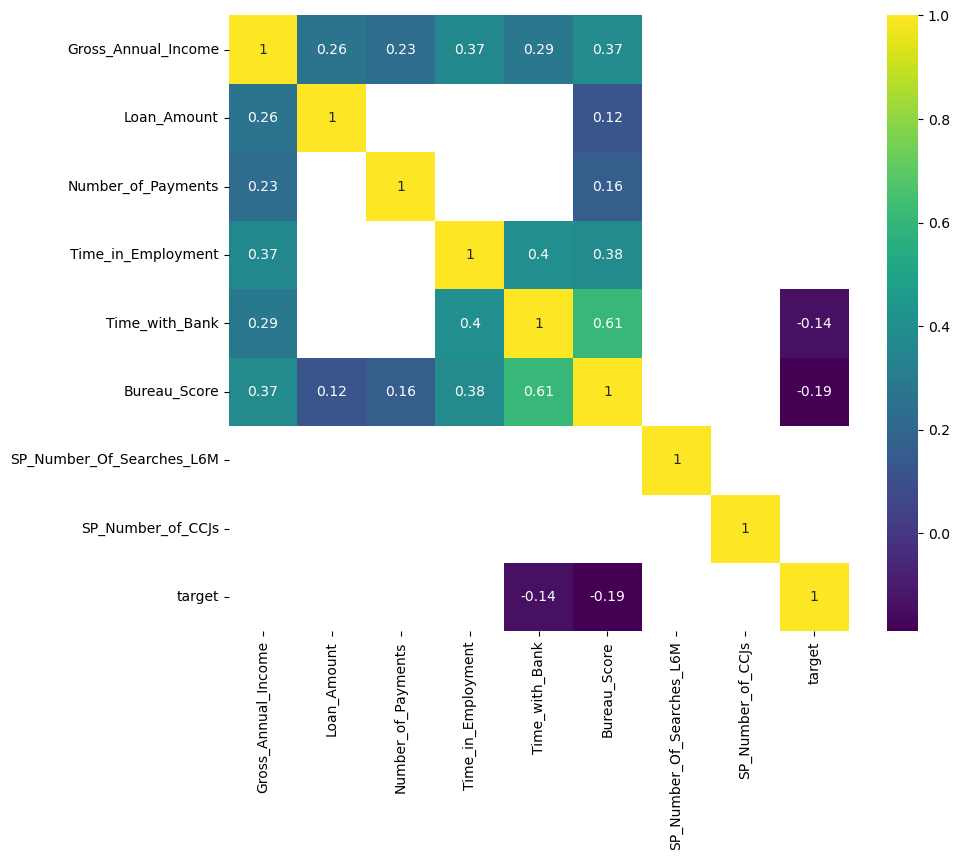

In [19]:
import warnings
warnings.filterwarnings('ignore')
data = df_num
data['target'] = df['target']
    
corr = data.corr() 
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap='viridis', annot=True)

Similarly, the pairwise relationship among variables, also show the points with different target values

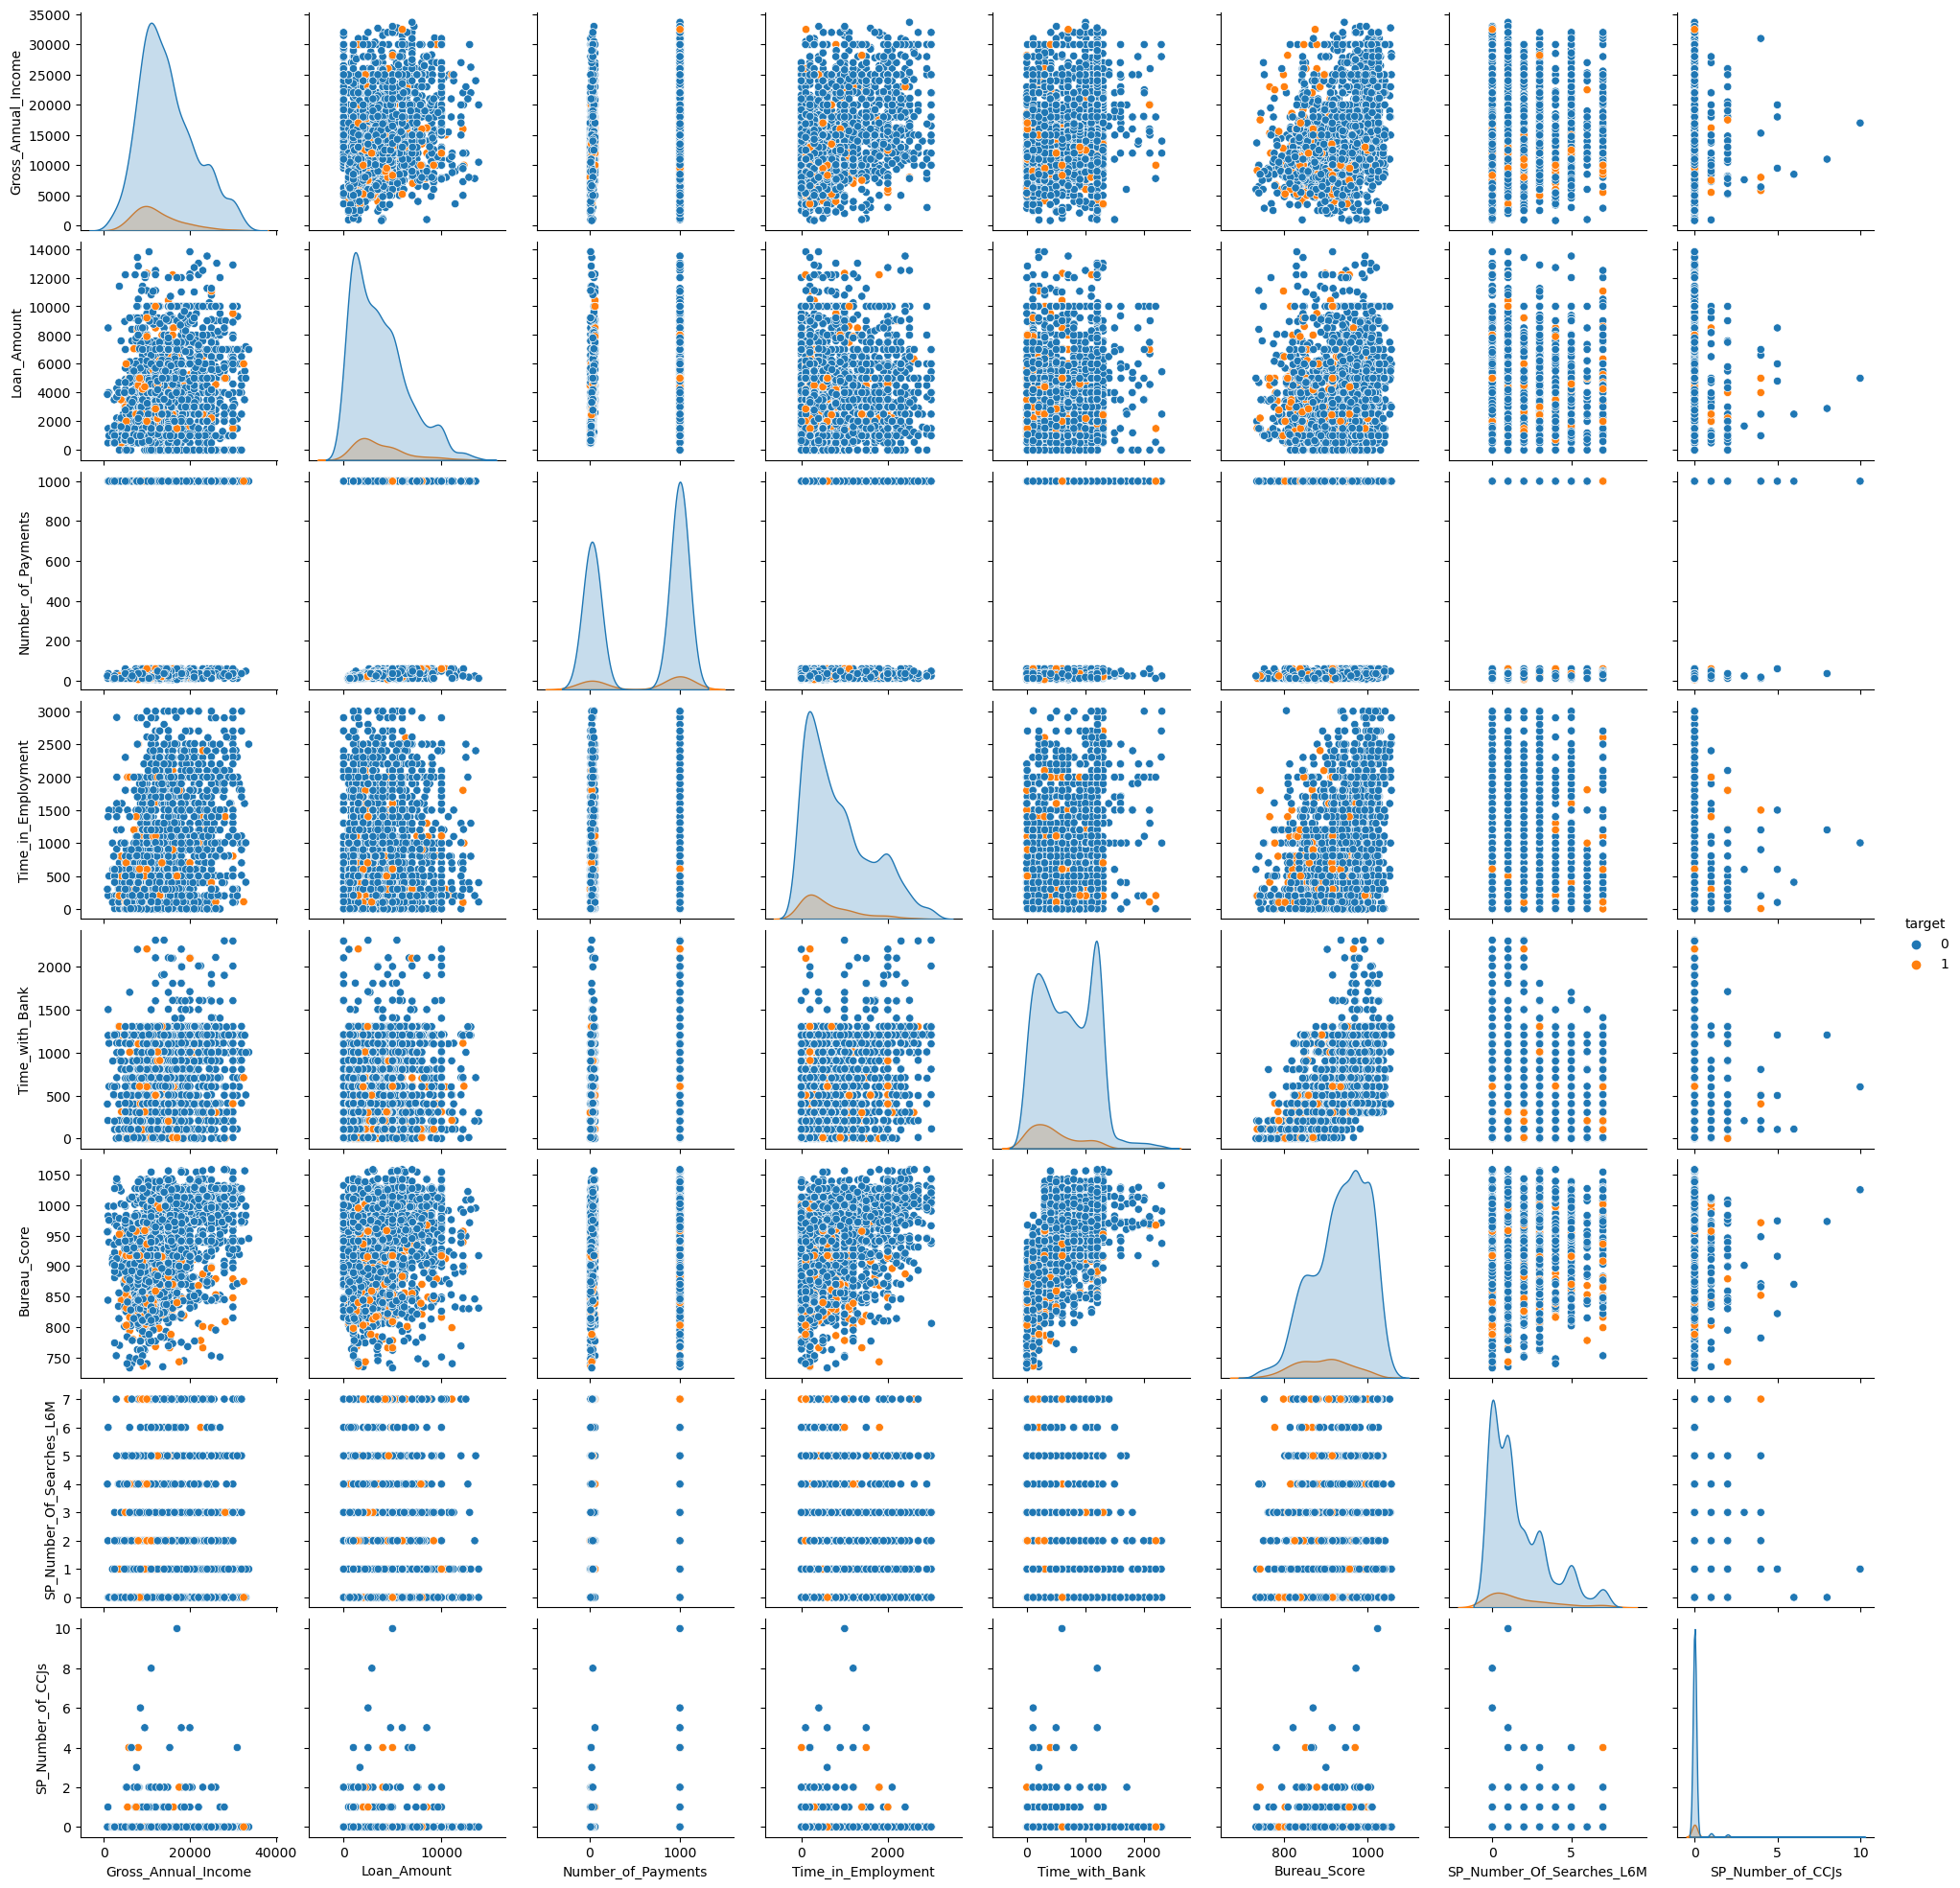

In [20]:
sns.pairplot(df, hue='target')

Perform the two-sample Kolmogorov-Smirnov (KS) test for goodness of fit. The KS coefficient are commonly used to analyze the importance of individual variables in connection with the target variable.

KS Statistic for each feature:
Bureau_Score: 0.3097455384952008
Time_with_Bank: 0.26331195145204034
Cheque_Card_Flag: 0.24400797522589404
Gross_Annual_Income: 0.179074186122839
Account_Type: 0.17796229852619075
Time_in_Employment: 0.14953102010105226
Loan_Payment_Method: 0.1373315144221645
Loan_Amount: 0.11556709616488088
Number_of_Payments: 0.05491786990915119
SP_Number_Of_Searches_L6M: 0.05490000826101227
SP_Number_of_CCJs: 0.024285143350889844


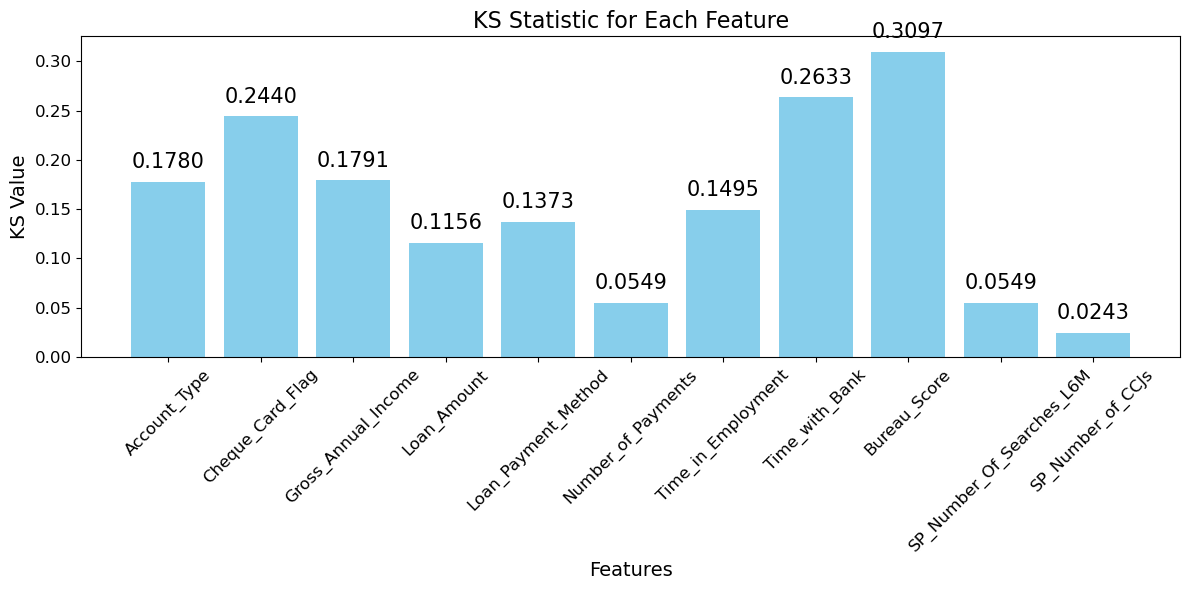

In [21]:
from scipy.stats import ks_2samp

# Calculate KS statistic for each feature
ks_values = {}
for feature in df.columns[:-1]:  
    ks_statistic, _ = ks_2samp(df[df['target'] == 0][feature], df[df['target'] == 1][feature])
    ks_values[feature] = f"{ks_statistic}"

sorted_ks_values = {k: v for k, v in sorted(ks_values.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted KS values
print("KS Statistic for each feature:")
for feature, ks_stat in sorted_ks_values.items():
    print(f"{feature}: {ks_stat}")

    
features = df.columns[:-1]
ks_values = list(ks_values.values())
ks_values = [float(value) for value in ks_values]
plt.figure(figsize=(12, 6))
plt.bar(features, ks_values, color='skyblue')
plt.xlabel('Features', fontsize=14)
plt.ylabel('KS Value', fontsize=14)
plt.title('KS Statistic for Each Feature', fontsize=16)

# Adding annotations for each bar
for i in range(len(features)):
    plt.text(i, ks_values[i] + 0.01, f'{ks_values[i]:.4f}', fontsize= 15,ha='center', va='bottom')

plt.xticks(rotation=45, fontsize=12)  # Adjust the tick label size here
plt.yticks(fontsize=12)  # Adjust the tick label size here
plt.tight_layout()
plt.show()

It seems that KS test also agrees with Pearson correlation computed above there Bureau_score and Time_with_Bank seems to have better correlation with the target variable though the correlation is quite small

We normalize the numerical input variables before feeding them into the training.

In [22]:
from sklearn.preprocessing import normalize
df[num_cols] = normalize(df[num_cols])

After normalization we have descriptive analysis

In [23]:
df[num_cols].describe().T

count      mean       std       min       25%  \
Gross_Annual_Income        2352.0  0.937329  0.082502  0.113583  0.923798   
Loan_Amount                2352.0  0.251091  0.173514  0.000000  0.117675   
Number_of_Payments         2352.0  0.043205  0.045798  0.000352  0.002180   
Time_in_Employment         2352.0  0.057570  0.055617  0.000000  0.017218   
Time_with_Bank             2352.0  0.048915  0.042469  0.000000  0.020260   
Bureau_Score               2352.0  0.073087  0.039550  0.026043  0.049441   
SP_Number_Of_Searches_L6M  2352.0  0.000124  0.000162  0.000000  0.000000   
SP_Number_of_CCJs          2352.0  0.000006  0.000044  0.000000  0.000000   

                                50%       75%       max  
Gross_Annual_Income        0.965329  0.984553  0.998830  
Loan_Amount                0.220120  0.348742  0.965454  
Number_of_Payments         0.040385  0.069284  0.446505  
Time_in_Employment         0.044653  0.081838  0.502117  
Time_with_Bank             0.041557  0.066374  0.410344  
Bureau_Score               0.064990  0.085744  0.597385  
SP_Number_Of_Searches_L6M  0.000073  0.000181  0.002225  
SP_Number_of_CCJs          0.000000  0.000000  0.000708

Now we get the data to train, X is the input including the input variables (numerical and categorical) and y is the target output variable

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

For categorical variables, we need to transform them, here we use OneHotEncoder

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
full_pipeline = ColumnTransformer([('category', OneHotEncoder(handle_unknown = 'ignore'), cat_cols)], remainder = 'passthrough')
encoder = full_pipeline.fit(X)
X = encoder.transform(X)

# DecisionTree and Logistic Regression classifiers
As suggested, we experiment with DecisionTree and Logistic Regression classifier to build 2 model to predict the target value. Because the proportion of target value in each class is very imbalanced, 9.29% is class 1 and 90.71% is class 0, so we need to balance the data. There are different ways to deal with imbalanced dataset:

- **Class Weights:**
    Assign higher weights to the samples of the minority class during training to give them more importance.
- **Upsampling:**
    Increase the number of samples in the minority class to balance the class distribution.
- **Downsampling:**
    Decrease the number of samples in the majority class to balance the class distribution.


In this experiment, we chose class_weight and upsampling techniques to balance the dataset.

Also, we use the stratify option in scikit-learn ensures that the proportion of the target variable (0 and 1) is the same in both the training and testing sets.

We also perform 5-fold cross-validation to get the performance of the models in each fold with information about Precision, Recall, F1-score, average accuracy.

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(class_weight='balanced')

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []

for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    print(f"\nFold {fold + 1} - Classification Report:")
    print(classification_report(y_val, y_pred))
    
    report = classification_report(y_val, y_pred, target_names=['0', '1'], output_dict=True)

    # Append metrics for each class
    precision_per_fold.append([report[label]['precision'] for label in ['0', '1']])
    recall_per_fold.append([report[label]['recall'] for label in ['0', '1']])
    f1_score_per_fold.append([report[label]['f1-score'] for label in ['0', '1']])




Cross-validation scores: [0.83651805 0.87048832 0.83829787 0.84893617 0.82553191]
Mean CV accuracy: 0.843954465374712

Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       429
           1       0.21      0.19      0.20        42

    accuracy                           0.86       471
   macro avg       0.57      0.56      0.56       471
weighted avg       0.86      0.86      0.86       471


Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       429
           1       0.17      0.19      0.18        42

    accuracy                           0.84       471
   macro avg       0.54      0.55      0.55       471
weighted avg       0.85      0.84      0.85       471


Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       429
           1       0

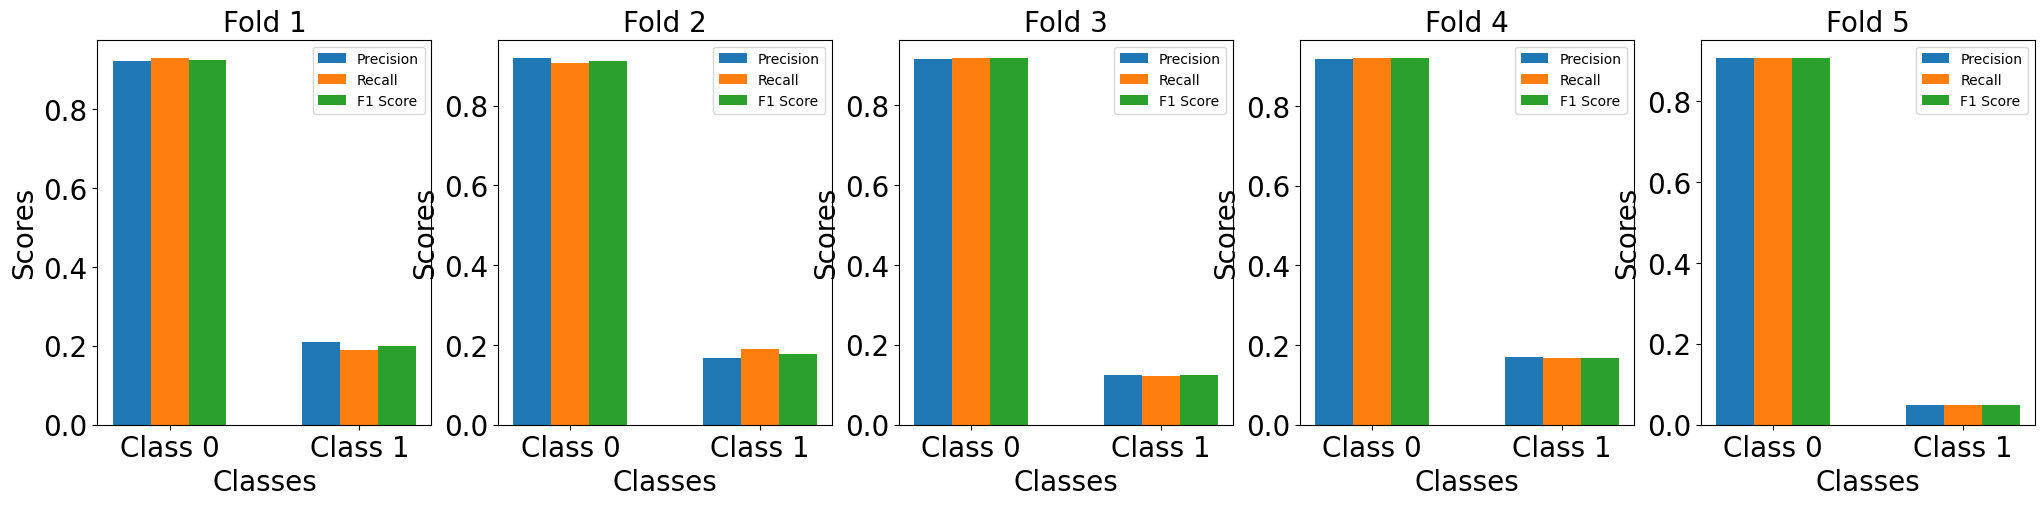

In [27]:
# Convert the lists to arrays for easier manipulation
precision_per_fold = np.array(precision_per_fold)
recall_per_fold = np.array(recall_per_fold)
f1_score_per_fold = np.array(f1_score_per_fold)

# Plotting
x = np.arange(2)  # Two classes
width = 0.2  # Width of the bars

# Plot all metrics for each fold in one row
fig, axs = plt.subplots(1, len(precision_per_fold), figsize=(25, 5))

for i in range(len(precision_per_fold)):
    axs[i].bar(x - width, precision_per_fold[i], width, label='Precision')
    axs[i].bar(x, recall_per_fold[i], width, label='Recall')
    axs[i].bar(x + width, f1_score_per_fold[i], width, label='F1 Score')

    axs[i].set_xlabel('Classes', fontsize=20)
    axs[i].set_ylabel('Scores', fontsize=20)
    axs[i].set_title(f'Fold {i + 1}', fontsize=20)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(['Class 0', 'Class 1'])
    axs[i].legend()

    # Increase tick label size
    axs[i].tick_params(axis='both', which='major', labelsize=20)

plt.show()

### Decision Tree Model Performance Summary

- **Cross-validation scores:**
  - Mean CV accuracy: 0.8376
  - Cross-validation scores across 5 folds: [0.84991274 0.83071553 0.82897033 0.83741259 0.83916084]

- **Fold-wise Classification Reports:**
  - For each fold, the classification report includes precision, recall, f1-score, and support for both classes (0 and 1).

  - **Fold 1:**
    - Accuracy: 0.85
    - Precision, recall, and f1-score are reported for both classes (0 and 1). Class 1 has low precision, recall, and f1-score.

  - **Fold 2:**
    - Accuracy: 0.83
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, recall, and f1-score.

  - **Fold 3:**
    - Accuracy: 0.83
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, recall, and f1-score.

  - **Fold 4:**
    - Accuracy: 0.84
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, recall, and f1-score.

  - **Fold 5:**
    - Accuracy: 0.84
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, recall, and f1-score.

### Observations and Insights

- The model demonstrates decent accuracy, but it seems to struggle with correctly predicting class 1 (positive cases).
- Precision, recall, and f1-score for class 1 are consistently low across all folds, indicating challenges in correctly identifying positive cases.
- Class imbalance or insufficient features related to class 1 could be a potential reason for the model's struggle with positive case predictions.

These observations can guide further model refinement or data preprocessing to improve the model's performance, especially in correctly identifying the positive cases.


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier
clf = LogisticRegression(class_weight='balanced', random_state=42)

# Initialize StratifiedKFold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []

for fold, (train_idx, val_idx) in enumerate(stratified_kfold.split(X, y)):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    print(f"\nFold {fold + 1} - Classification Report:")
    print(classification_report(y_val, y_pred))
    
    report = classification_report(y_val, y_pred, target_names=['0', '1'], output_dict=True)

    # Append metrics for each class
    precision_per_fold.append([report[label]['precision'] for label in ['0', '1']])
    recall_per_fold.append([report[label]['recall'] for label in ['0', '1']])
    f1_score_per_fold.append([report[label]['f1-score'] for label in ['0', '1']])




Cross-validation scores: [0.66242038 0.69002123 0.64680851 0.66170213 0.64255319]
Mean CV accuracy: 0.6607010886750688

Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78       429
           1       0.16      0.67      0.26        42

    accuracy                           0.66       471
   macro avg       0.56      0.66      0.52       471
weighted avg       0.88      0.66      0.73       471


Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       429
           1       0.16      0.60      0.26        42

    accuracy                           0.69       471
   macro avg       0.55      0.65      0.53       471
weighted avg       0.88      0.69      0.76       471


Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       429
           1       

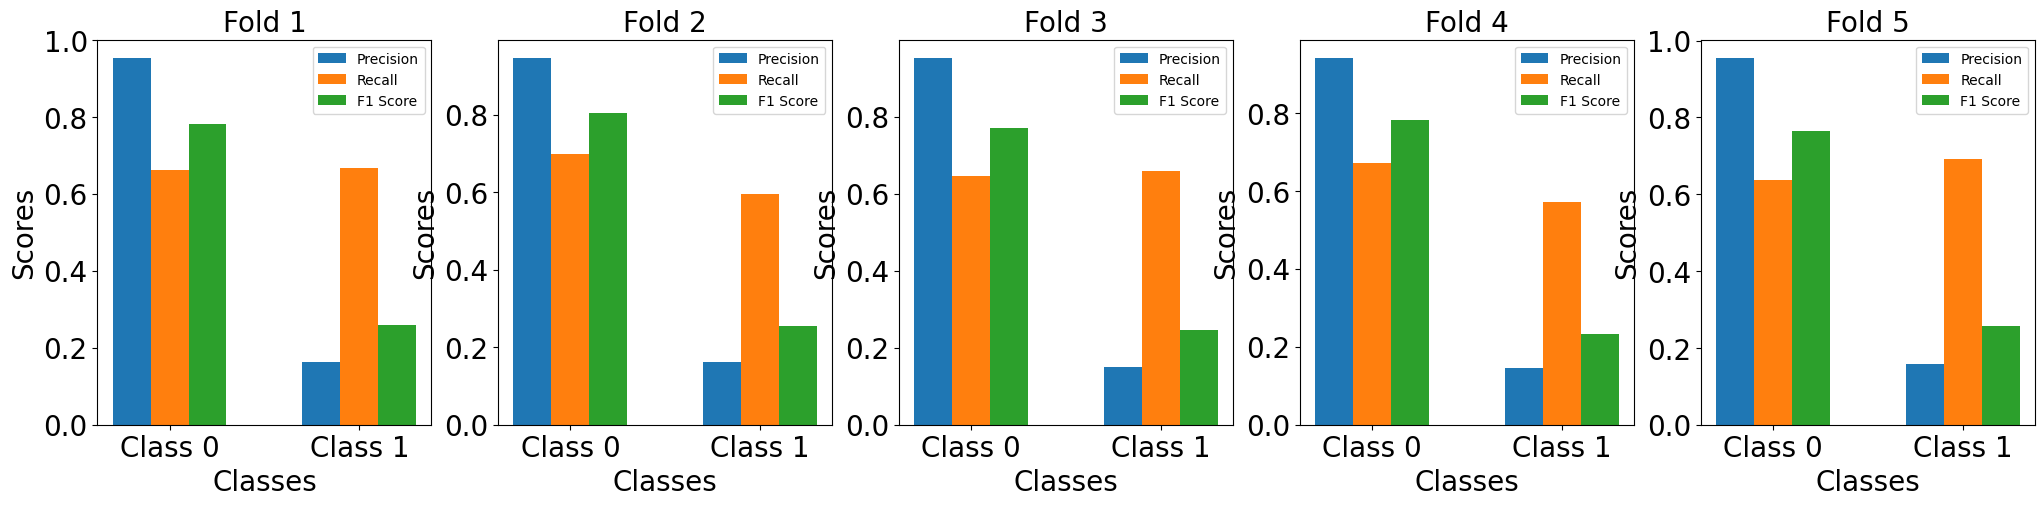

In [29]:
# Convert the lists to arrays for easier manipulation
precision_per_fold = np.array(precision_per_fold)
recall_per_fold = np.array(recall_per_fold)
f1_score_per_fold = np.array(f1_score_per_fold)

# Plotting
x = np.arange(2)  # Two classes
width = 0.2  # Width of the bars

# Plot all metrics for each fold in one row
fig, axs = plt.subplots(1, len(precision_per_fold), figsize=(25, 5))

for i in range(len(precision_per_fold)):
    axs[i].bar(x - width, precision_per_fold[i], width, label='Precision')
    axs[i].bar(x, recall_per_fold[i], width, label='Recall')
    axs[i].bar(x + width, f1_score_per_fold[i], width, label='F1 Score')

    axs[i].set_xlabel('Classes', fontsize=20)
    axs[i].set_ylabel('Scores', fontsize=20)
    axs[i].set_title(f'Fold {i + 1}', fontsize=20)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(['Class 0', 'Class 1'])
    axs[i].legend()

    # Increase tick label size
    axs[i].tick_params(axis='both', which='major', labelsize=20)

plt.show()

### Logistic Regression Model Performance Summary

- **Cross-validation scores:**
  - Mean CV accuracy: 0.6734
  - Cross-validation scores across 5 folds: [0.66841187 0.68411867 0.66317627 0.6486014  0.7027972 ] 

- **Fold-wise Classification Reports:**
  - For each fold, the classification report includes precision, recall, f1-score, and support for both classes (0 and 1).

  - **Fold 1:**
    - Accuracy: 0.67
    - Precision, recall, and f1-score are reported for both classes (0 and 1). Class 1 has low precision, but better recall compared to the decision tree model.

  - **Fold 2:**
    - Accuracy: 0.68
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, but better recall compared to the decision tree model.

  - **Fold 3:**
    - Accuracy: 0.66
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, but better recall compared to the decision tree model.

  - **Fold 4:**
    - Accuracy: 0.65
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, but better recall compared to the decision tree model.

  - **Fold 5:**
    - Accuracy: 0.70
    - Precision, recall, and f1-score are reported for both classes. Class 1 has low precision, but better recall compared to the decision tree model.

### Observations and Insights

- The Logistic Regression model demonstrates reasonable accuracy, but it also struggles with correctly predicting class 1 (positive cases).
- Similar conclusion about Precision, recall, and f1-score indicating a potential reason for the model's struggle with positive case predictions as for Decision Tree classifier.




### Quantitative Comparison on the performance of the 2 models

- **Mean Cross-Validation Accuracy:**
  - **Decision Tree:** 0.8376
  - **Logistic Regression:** 0.6734

- **Mean Precision for Class 1 (Positive Cases):**
  - **Decision Tree:** ~0.20 (average across all folds)
  - **Logistic Regression:** ~0.16 (average across all folds)

- **Mean Recall for Class 1 (Positive Cases):**
  - **Decision Tree:** ~0.16 (average across all folds)
  - **Logistic Regression:** ~0.52 (average across all folds)

- **Mean F1-score for Class 1 (Positive Cases):**
  - **Decision Tree:** ~0.17 (average across all folds)
  - **Logistic Regression:** ~0.25 (average across all folds)

### Summary

- The Decision Tree model demonstrates higher mean cross-validation accuracy compared to Logistic Regression, indicating better overall performance in terms of correctly predicting the target variable.

- In terms of precision for Class 1 (positive cases), the Decision Tree also performs slightly better compared to Logistic Regression.

- However, Logistic Regression performs significantly better in terms of mean recall and mean F1-score for Class 1 (positive cases), indicating a better ability to identify positive cases.

### Interpretation

- If the primary goal is overall accuracy and correct prediction of the target variable, the Decision Tree model might be preferred.

- If the goal is to prioritize correctly identifying positive cases (Class 1), even at the expense of some overall accuracy, then Logistic Regression might be a better choice.

The choice of the model would depend on the specific objectives of the analysis and the importance of correctly predicting positive cases in the given context.


We do similarly, but this time we use upsampling technique to balance the classes just to check if it leads to different result with different balancing techniques or not.

### DecisionTree

In [31]:
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate the majority and minority classes in the training set
# assuming 0 is the majority class and 1 is the minority class
X_train_majority = X_train[y_train['target'] == 0]
X_train_minority = X_train[y_train['target'] == 1]

# Upsample the minority class in the training set to match the majority class
X_train_minority_upsampled = resample(X_train_minority, replace=True, n_samples=len(X_train_majority), random_state=42)

# Combine the upsampled minority class with the majority class in the training set
X_train_upsampled = np.concatenate([X_train_majority, X_train_minority_upsampled])
y_train_upsampled = np.concatenate([np.full(len(X_train_majority), 0), np.full(len(X_train_minority_upsampled), 1)])

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform cross-validation for Decision Tree
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(dt_classifier, X_train_upsampled, y_train_upsampled, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Decision Tree - Cross-validation scores:", dt_cv_scores)
print("Decision Tree - Mean CV accuracy:", np.mean(dt_cv_scores))

# Fit the Decision Tree classifier on the upsampled data
dt_classifier.fit(X_train_upsampled, y_train_upsampled)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree - Accuracy on test set:", accuracy_dt)

# Classification report on the test set
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree - Cross-validation scores: [0.94169096 0.94460641 0.93148688 0.93138686 0.95912409]
Decision Tree - Mean CV accuracy: 0.9416590410929752
Decision Tree - Accuracy on test set: 0.8577494692144374
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       429
           1       0.18      0.17      0.17        42

    accuracy                           0.86       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.85      0.86      0.86       471



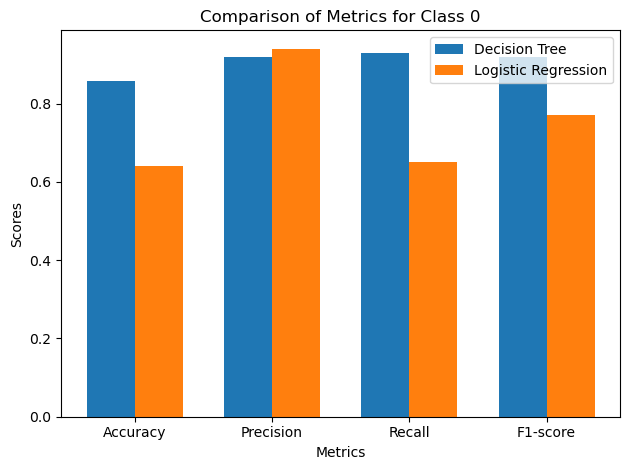

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for the Decision Tree model
decision_tree_metrics = {
    'accuracy': 0.8577494692144374,
    'precision': 0.92,
    'recall': 0.93,
    'f1_score': 0.92
}

# Metrics for the Logistic Regression model
logistic_regression_metrics = {
    'accuracy': 0.6411889596602972,
    'precision': 0.94,
    'recall': 0.65,
    'f1_score': 0.77
}

# Labels for the bars
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Values for the Decision Tree model
decision_tree_values = [decision_tree_metrics['accuracy'], decision_tree_metrics['precision'],
                        decision_tree_metrics['recall'], decision_tree_metrics['f1_score']]

# Values for the Logistic Regression model
logistic_regression_values = [logistic_regression_metrics['accuracy'], logistic_regression_metrics['precision'],
                              logistic_regression_metrics['recall'], logistic_regression_metrics['f1_score']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, decision_tree_values, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, logistic_regression_values, width, label='Logistic Regression')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Class 0')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


### Logistic Regression

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate the majority and minority classes in the training set
# assuming 0 is the majority class and 1 is the minority class
X_train_majority = X_train[y_train['target'] == 0]
X_train_minority = X_train[y_train['target'] == 1]

# Upsample the minority class in the training set to match the majority class
X_train_minority_upsampled = resample(X_train_minority, replace=True, n_samples=len(X_train_majority), random_state=42)

# Combine the upsampled minority class with the majority class in the training set
X_train_upsampled = np.concatenate([X_train_majority, X_train_minority_upsampled])
y_train_upsampled = np.concatenate([np.full(len(X_train_majority), 0), np.full(len(X_train_minority_upsampled), 1)])

# Initialize the Logistic Regression classifier
log_reg_classifier = LogisticRegression(random_state=42)

# Perform cross-validation for Logistic Regression
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg_cv_scores = cross_val_score(log_reg_classifier, X_train_upsampled, y_train_upsampled, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Logistic Regression - Cross-validation scores:", log_reg_cv_scores)
print("Logistic Regression - Mean CV accuracy:", np.mean(log_reg_cv_scores))

# Fit the Logistic Regression classifier on the upsampled data
log_reg_classifier.fit(X_train_upsampled, y_train_upsampled)

# Predict on the test set
y_pred_log_reg = log_reg_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression - Accuracy on test set:", accuracy_log_reg)

# Classification report on the test set
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Cross-validation scores: [0.62244898 0.68367347 0.66763848 0.68759124 0.6540146 ]
Logistic Regression - Mean CV accuracy: 0.663073354472133
Logistic Regression - Accuracy on test set: 0.6411889596602972
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       429
           1       0.14      0.60      0.23        42

    accuracy                           0.64       471
   macro avg       0.54      0.62      0.50       471
weighted avg       0.87      0.64      0.72       471



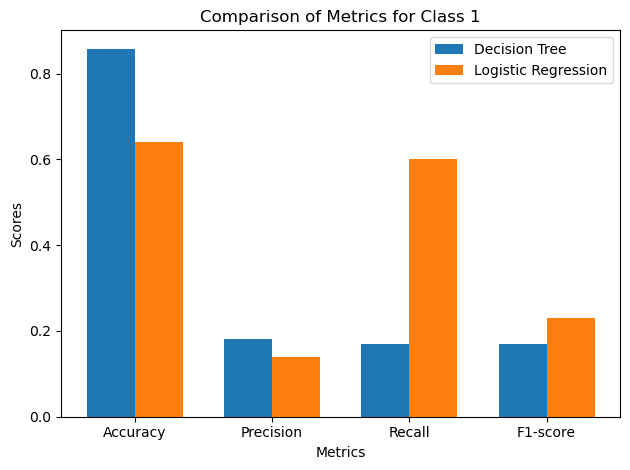

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for the Decision Tree model
decision_tree_metrics = {
    'accuracy': 0.8577494692144374,
    'precision': 0.18,
    'recall': 0.17,
    'f1_score': 0.17
}

# Metrics for the Logistic Regression model
logistic_regression_metrics = {
    'accuracy': 0.6411889596602972,
    'precision': 0.14,
    'recall': 0.60,
    'f1_score': 0.23
}

# Labels for the bars
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Values for the Decision Tree model
decision_tree_values = [decision_tree_metrics['accuracy'], decision_tree_metrics['precision'],
                        decision_tree_metrics['recall'], decision_tree_metrics['f1_score']]

# Values for the Logistic Regression model
logistic_regression_values = [logistic_regression_metrics['accuracy'], logistic_regression_metrics['precision'],
                              logistic_regression_metrics['recall'], logistic_regression_metrics['f1_score']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, decision_tree_values, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, logistic_regression_values, width, label='Logistic Regression')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Class 1')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


We observe a similar results with both DecisionTree and Logistic Regression for the 2 different balancing technique: class_weight and upsampling

# Conclusions

### The Nature of the Models

- **Decision Tree:**
  - Decision trees create a set of rules to classify instances.
  
- **Logistic Regression:**
  - Logistic regression models the probability of a binary outcome using a logistic function.

### Sensitivity to Feature Relationships

- **Decision Tree:**
  - Decision trees can capture complex interactions between features, potentially allowing for a more flexible representation of the underlying data.
  
- **Logistic Regression:**
  - Logistic regression assumes a linear relationship between the features and the log-odds of the target.

### Class Imbalance Handling

Both models were trained using balancing techniques to handle the class imbalance. However, the decision tree model may have adapted better to this handling due to its internal mechanisms for handling weights and class distributions (Gini impurity). When constructing a decision tree, the algorithm aims to minimize the Gini impurity at each split. The split that results in the lowest Gini impurity is chosen as the best split to create the most informative and predictive decision tree. Lower Gini impurity indicates a better split, resulting in a more accurate and informative decision tree model.
